In [1]:
# Run this cell to see the result
100 * 1.75 * 17

2975.0

Modify any of the numbers and rerun the cell.

## Data science notebooks & data analysis
Notebooks are great for interactive data analysis. Let's create a pandas DataFrame using the `read_csv()` function. 

We will load the dataset "chocolate_bars.csv" containing different characteristics of over 2,500 chocolate bars and their reviews.

By using the `.head()` method, we display the first five rows of data:

In [2]:
# Importing the pandas module
import pandas as pd

# Reading in the data
df = pd.read_csv('data/chocolate_bars.csv')

# Take a look at the first datapoints
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## Data analysis example:

Find the average rating for chocolate bars with different numbers of ingredients. 

We can use `.groupby()` to group the information by the column "num_ingredients". Then we select the column "rating" and use `.mean()` to get the average rating for each group:

In [3]:
df.groupby('num_ingredients')[['rating']].mean()

,rating
num_ingredients,
1.0,2.958333
2.0,3.218000
3.0,3.268817
4.0,3.127932
5.0,3.079843
6.0,2.937500


## Data science notebooks & visualizations
Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.

It is very straightforward to include plots in a data science notebook. For example, let's take a look at the relationship between review year and rating. 

We are using the `seaborn` library for this example. We will run the `scatterplot()` function and include the variables we want to display.

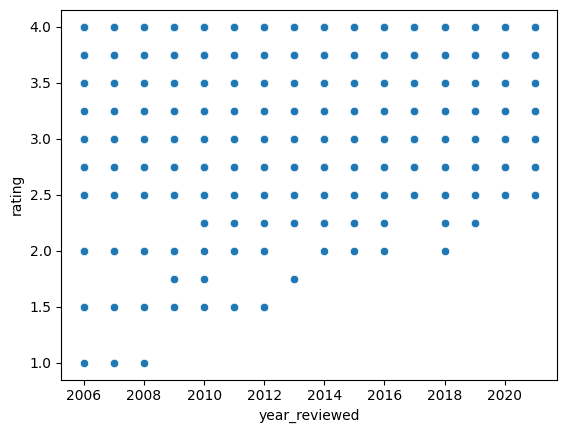

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='year_reviewed', y='rating', data=df)
plt.show()

We can also make a plot from the table we calculated above (average rating for chocolate bars with different numbers of ingredients):

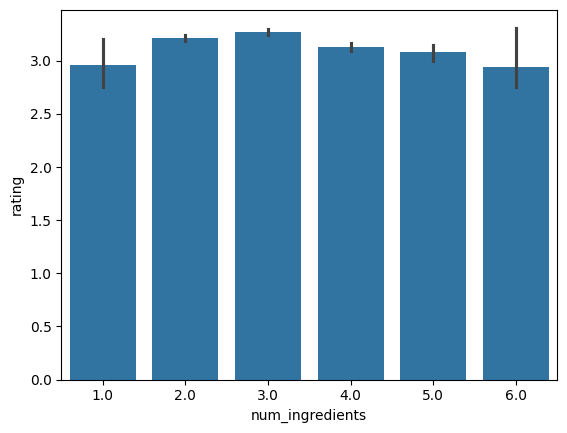

In [5]:
sns.barplot(x='num_ingredients', y='rating', data=df)
plt.show()

# Finding the best chocolate bars

Now let's now move on to the competition and challenge.

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

# Imports

In [38]:
# Importing the pandas module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reading in the data
df = pd.read_csv('data/chocolate_bars.csv')
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


# Q1. What is the average rating by country of origin?

In [39]:
avg_rating = df.groupby("bean_origin")['rating'].mean().sort_values(ascending = False).reset_index()
avg_rating.columns = ['country', 'avg_rating']
avg_rating

,country,avg_rating
0,Tobago,3.625000
1,China,3.500000
2,Sao Tome & Principe,3.500000
3,Solomon Islands,3.450000
4,Congo,3.318182
...,...,...
57,Sierra Leone,2.750000
58,St.Vincent-Grenadines,2.750000
59,Principe,2.750000
60,Martinique,2.750000


# Q2 How many bars were reviewed for each of those countries?

In [40]:
bar_count = df.groupby("bean_origin")['rating'].count().sort_values(ascending = False).reset_index()
bar_count.columns = ['country', 'count']
bar_count

,country,count
0,Venezuela,253
1,Peru,244
2,Dominican Republic,226
3,Ecuador,219
4,Madagascar,177
...,...,...
57,Suriname,1
58,Sumatra,1
59,Sulawesi,1
60,St.Vincent-Grenadines,1


# Q3. Create plots to visualize Q1 & Q2

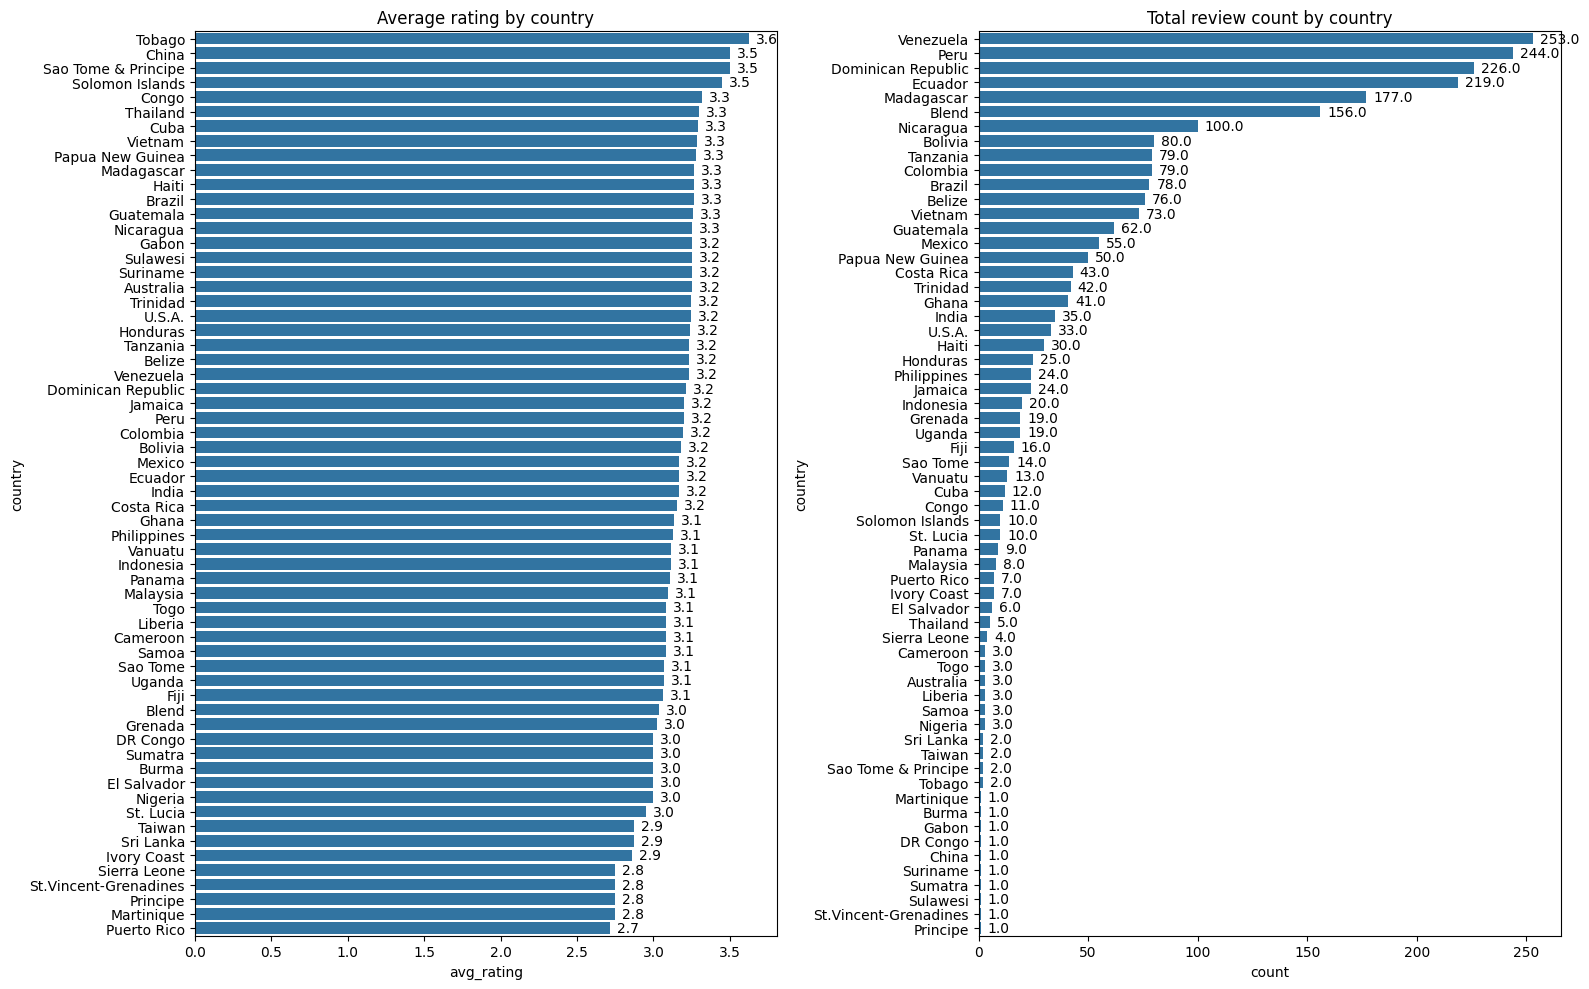

In [41]:
fig, axs = plt.subplots(1, 2, figsize = (16, 10))

sns.barplot(data = avg_rating, y = 'country', x = 'avg_rating', ax = axs[0])
sns.barplot(data = bar_count, y = 'country', x = 'count', ax = axs[1])

# Annotate the first subplot
for p in axs[0].patches:
    axs[0].annotate(format(p.get_width(), '.1f'),  # Use p.get_width() for horizontal bars
                 (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                 ha='left', va='center', 
                 xytext=(5, 0), 
                 textcoords='offset points')

# Annotate the second subplot
for p in axs[1].patches:
    axs[1].annotate(format(p.get_width(), '.1f'),  # Use p.get_width() for horizontal bars
                 (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.), 
                 ha='left', va='center', 
                 xytext=(5, 0), 
                 textcoords='offset points')

axs[0].set_title("Average rating by country")
axs[1].set_title("Total review count by country")

plt.tight_layout()

# Q4. Is the cacao bean's origin an indicator of quality?

Index(['country', 'avg_rating', 'count'], dtype='object')


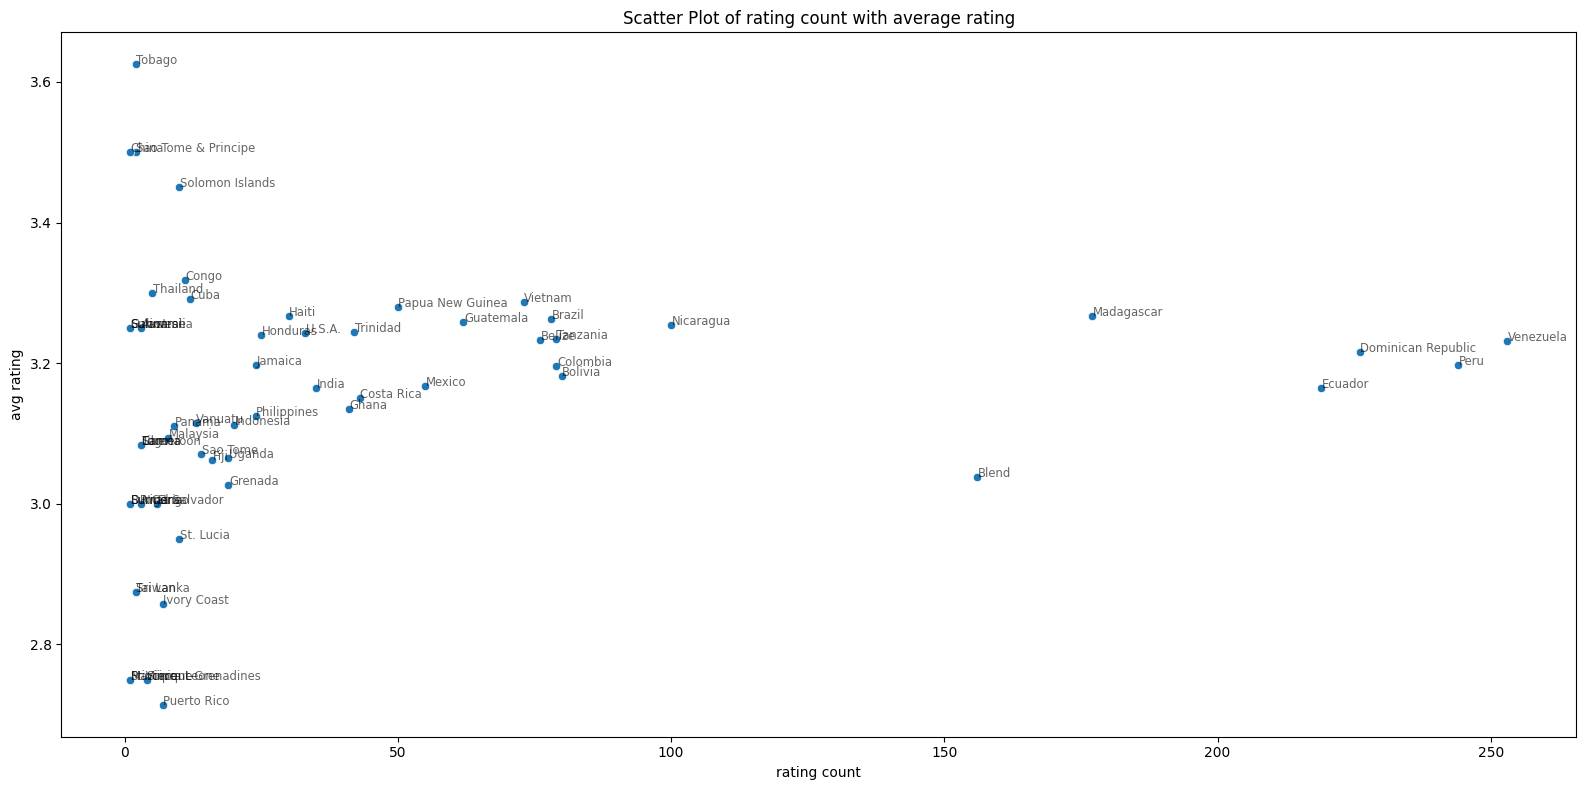

In [42]:
plt.figure(figsize = (16, 8))

merge = pd.merge(avg_rating, bar_count, on = 'country', how = 'left').sort_values(by = 'count', ascending = False)
ax = sns.scatterplot(data = merge, x = 'count', y = 'avg_rating')

print(merge.columns)

# Annotate each point in the scatter plot
for i in range(merge.shape[0]):
    ax.text(merge['count'][i] + 0.1,  # slightly offset the text in the x direction for clarity
            merge['avg_rating'][i],  # slightly offset the text in the y direction for clarity
            merge['country'][i],  # text to display
            horizontalalignment='left',
            size='small', color='black', weight=None, alpha = 0.6)

plt.xlabel('rating count')
plt.ylabel('avg rating')
plt.title('Scatter Plot of rating count with average rating')

plt.tight_layout()

# Q5.1 How does cocoa content relate to rating?

In [43]:
corr_val = df[['cocoa_percent','rating']].corr().iloc[0, 1]
print(f"For every 1-percent increase in cocoa content, the average rating falls by {round(corr_val, 2)}")

For every 1-percent increase in cocoa content, the average rating falls by -0.15


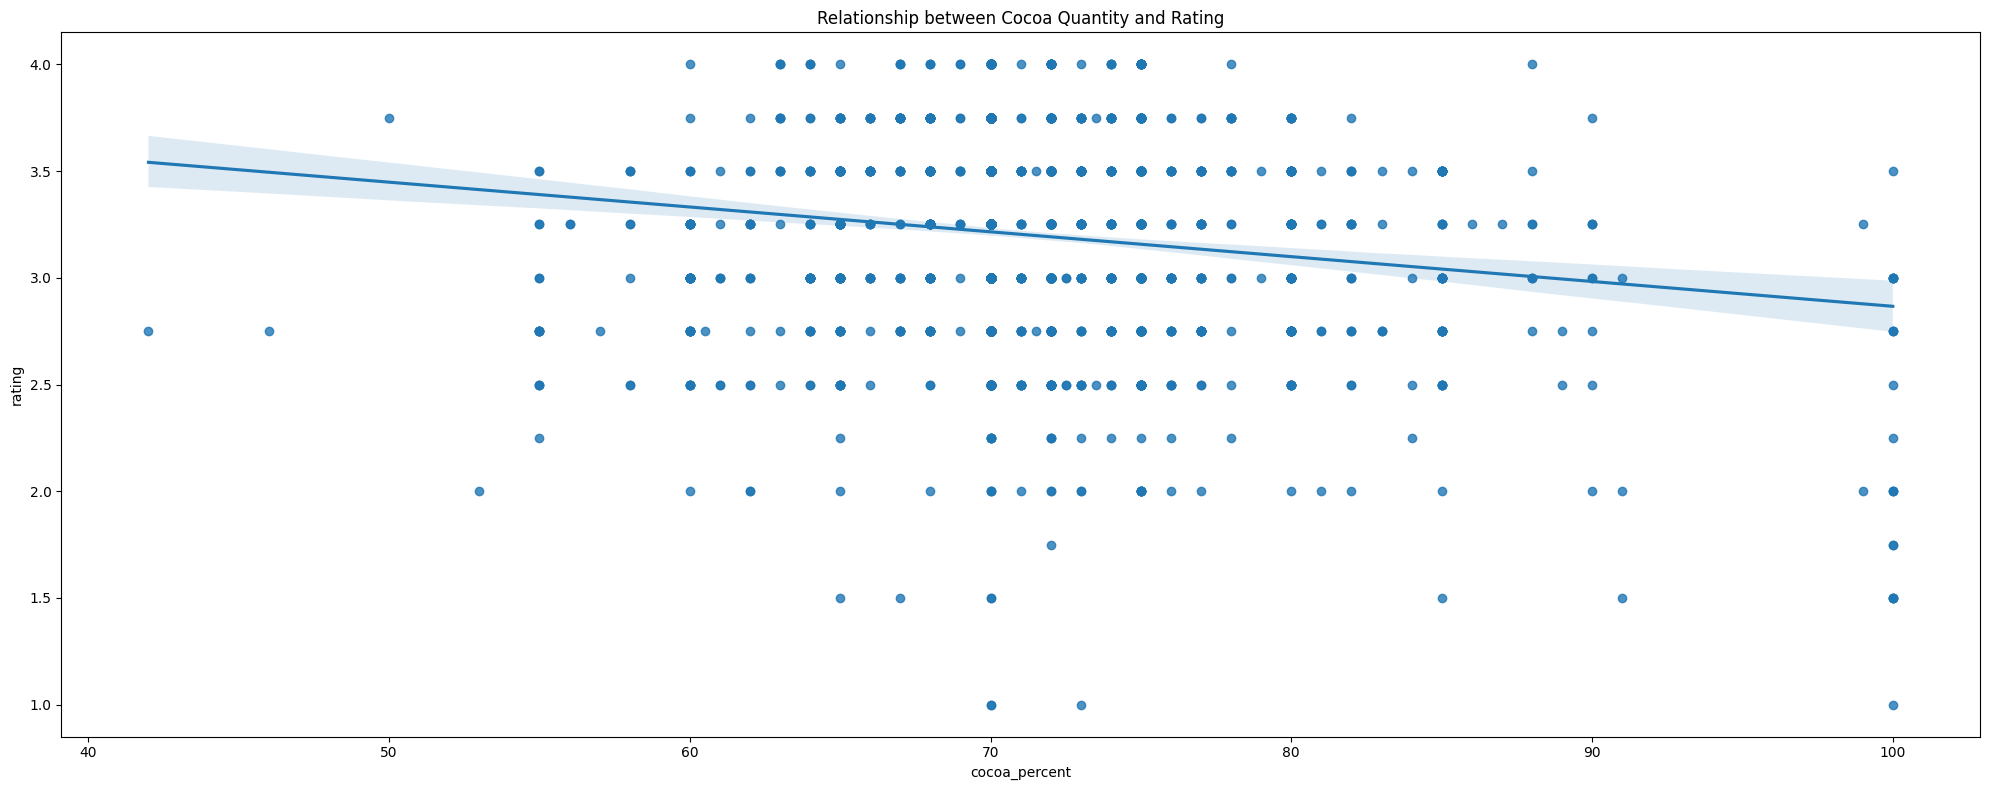

In [44]:
plt.figure(figsize = (20, 8))
ax = sns.regplot(data = df, x = 'cocoa_percent', y = 'rating')
plt.title("Relationship between Cocoa Quantity and Rating")
plt.tight_layout()

# Q5.2 What is the average cocoa content for bars with higher ratings (above 3.5)?

In [45]:
avg_cocoa = df.groupby("bean_origin")['cocoa_percent'].mean().sort_values(ascending = False).reset_index()
avg_cocoa.columns = ['country', 'avg_cocoa']
merge = pd.merge(avg_rating, avg_cocoa, on = 'country', how = 'inner')
answer = merge[merge['avg_rating'] > 3.5]
merge['is_above_3.5'] = merge['avg_rating'].apply(lambda x: 'Yes' if x > 3.5 else 'No')
answer

,country,avg_rating,avg_cocoa
0,Tobago,3.625,65.0


In [52]:
merge

,country,avg_rating,avg_cocoa,is_above_3.5
0,Tobago,3.625000,65.000000,Yes
1,China,3.500000,72.000000,No
2,Sao Tome & Principe,3.500000,72.500000,No
3,Solomon Islands,3.450000,71.800000,No
4,Congo,3.318182,70.454545,No
...,...,...,...,...
57,Sierra Leone,2.750000,71.000000,No
58,St.Vincent-Grenadines,2.750000,72.000000,No
59,Principe,2.750000,77.000000,No
60,Martinique,2.750000,42.000000,No


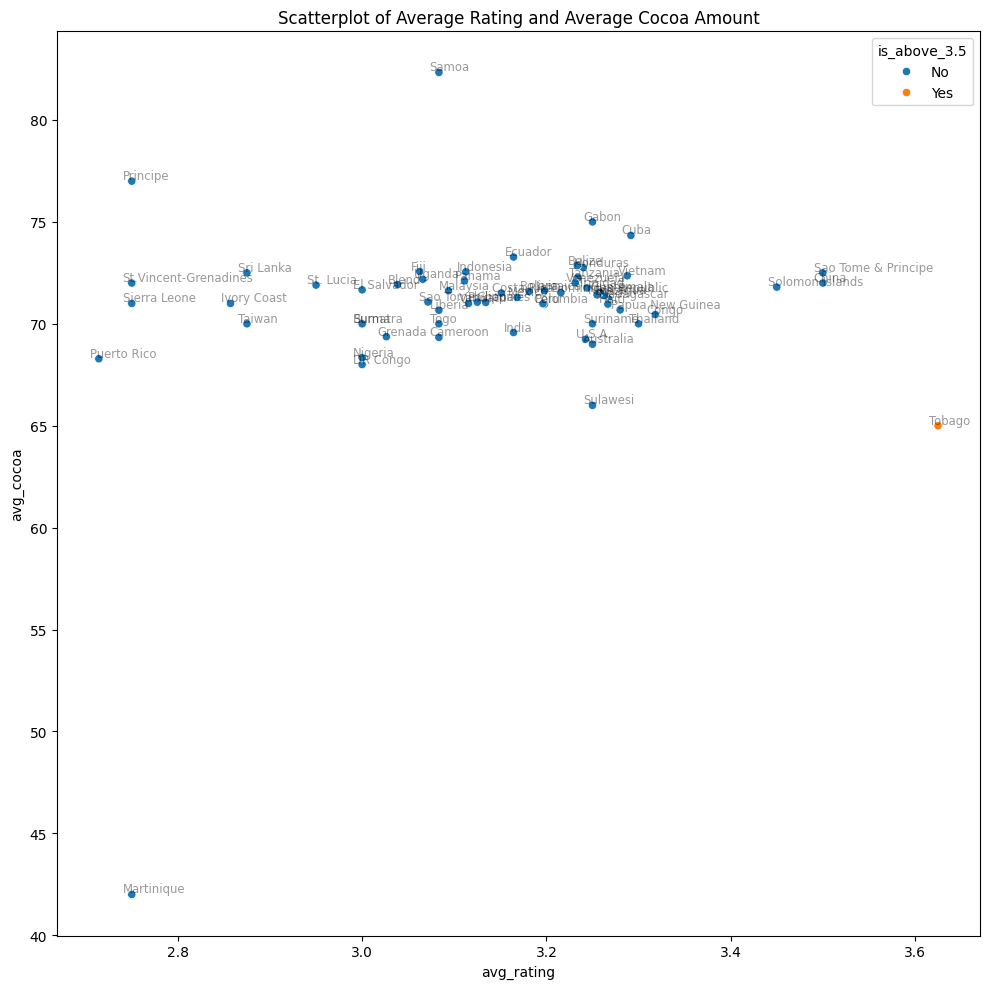

In [60]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(data = merge, x = 'avg_rating', y = 'avg_cocoa', hue = 'is_above_3.5', hue_order=['No', 'Yes'])

# Annotate each point in the scatter plot
for i in range(merge.shape[0]):
    ax.text(merge['avg_rating'][i] - 0.01,  # use proper indexing for DataFrame columns
            merge['avg_cocoa'][i] + 0.1,  # use proper indexing for DataFrame columns
            merge['country'][i],  # use proper indexing for DataFrame columns
            horizontalalignment='left',
            size='small', color='black', weight=None, alpha = 0.4)

plt.title("Scatterplot of Average Rating and Average Cocoa Amount")
plt.tight_layout()

# Q6. Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

In [47]:
df['ingredient_array'] = df['ingredients'].apply(lambda x: str(x).split(',') if ',' in str(x) else str(x))

In [48]:
# B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt

df['has_beans'] = df['ingredient_array'].apply(lambda x: 1 if 'B' in x else 0)
df['has_sugar'] = df['ingredient_array'].apply(lambda x: 1 if 'S' in x else 0)
df['has_sweetener'] = df['ingredient_array'].apply(lambda x: 1 if 'S*' in x else 0)
df['has_cocoa_butter'] = df['ingredient_array'].apply(lambda x: 1 if 'C' in x else 0)
df['has_vanilla'] = df['ingredient_array'].apply(lambda x: 1 if 'V' in x else 0)
df['has_lecithin'] = df['ingredient_array'].apply(lambda x: 1 if 'L' in x else 0)
df['has_salt'] = df['ingredient_array'].apply(lambda x: 1 if 'Sa' in x else 0)

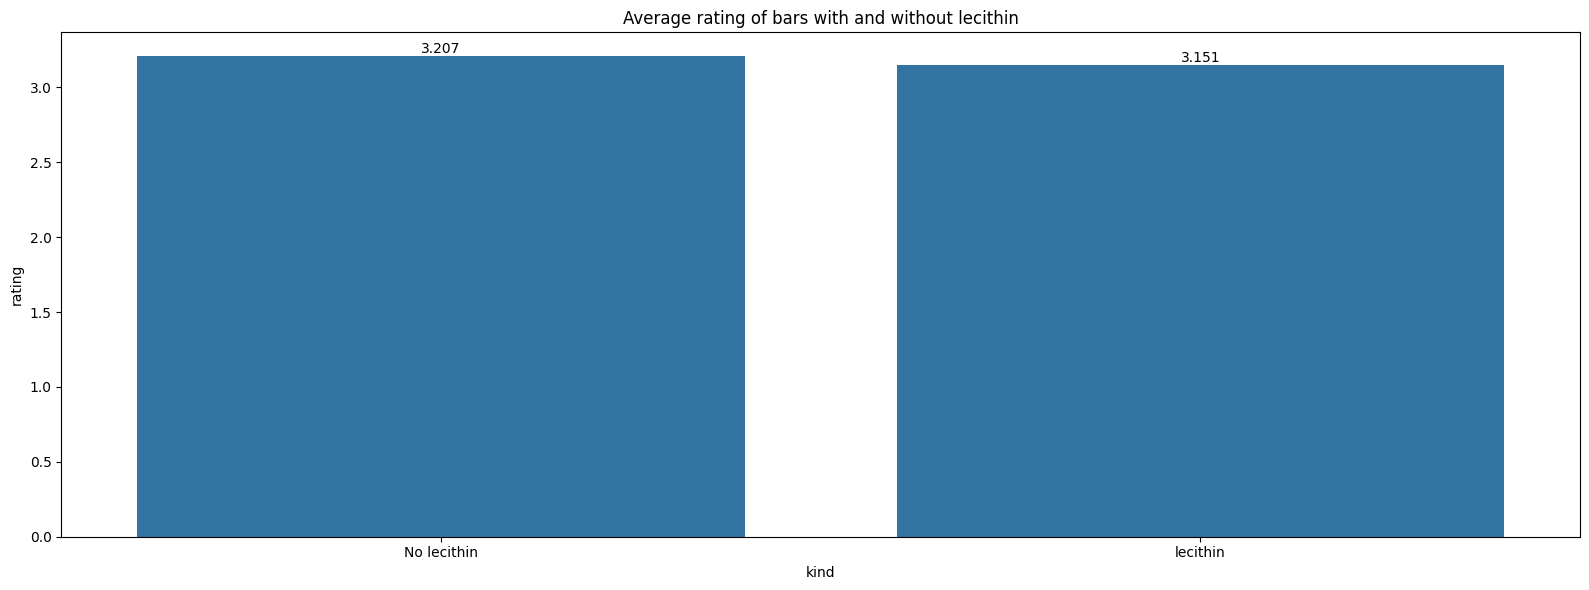

In [49]:
plt.figure(figsize = (16, 6))

mapping = {
    0: 'No lecithin',
    1: 'lecithin'
}

answer = df.groupby('has_lecithin')['rating'].mean().reset_index()
answer.columns = ['kind', 'rating']
answer['kind'] = answer['kind'].map(mapping)
ax = sns.barplot(data = answer, x = 'kind', y = 'rating')

# Annotate each bar with its respective value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.title("Average rating of bars with and without lecithin")
plt.tight_layout()